# **ANAMOLY DETECTION**

 Anamoly Detection is also known as outlier detection. Let us understand the Outlier in the Laymen language. For instance, you are asked to remove the rotten tomatoes from bucket because if not separated it will also spoil the other good tomatoes.
 
Similarly, there are variable/features/data points which are of no use or making no difference but could be responsible for greater loss. Thus we need to find the Outliers and remove them for better accuracy.


![alt text](https://developer.mindsphere.io/apis/analytics-anomalydetection/images/DBSCAN.png)


The noise are the data points which are detected as the outliers.


Anamoly Detection is categorized into three broad categories - 

1. **Supervised Anamoly Detection**
    In Supervised Detection, there is a classifier which classifies whether the data pints is Normal or Abnormal.

2. **Unsupervised Anamoly Detection**
    It detects the anomalies in the given dataset by assuming that the testing dataset contains the least fit to the remainder of the data set.

3. **Semi-Supervised Anamoly Detection** 
    The training data set to construct the normal behaviour to the model and it checks the test data for the likelihood by the experience the model generated.

***Anamolies and is classifications***

Anamoly is use to identify the rare items, suspcious items, events and outcomes which can raise a harm to the model.

The anamolies have several classifications - 

1. **Point anamolies**
    When a single data point is too far from the rest data points which makes it merely impossible to make the cluster or map it to the data points or cluster then we simply remove such data points. This is called the point anamolies.
![alt text](https://www.holehouse.org/mlclass/15_Anomaly_Detection_files/Image%20[2].png)

2. **Contextual anamolies**
    If the abnormality is context specific, For instance investing 1000 rupee everyday on buying shoe since you play football is normal, but odd anyway.

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3k8-YQ-IONhaaJUXT0kebMOi8_PmguyQNchMFYXgeWnIMHZSmjQ&s)

3. **Collective anamolies**
    A set of data instance is responsible to track this anamoly. If someone is remotely using a machine and extracting the information to the local host. It gives the sign of the cyber attack.

![alt text](https://i.stack.imgur.com/4ZArw.jpg)

Anamoly Detection is similar to Novelty detection but not completly similar. Novelty Detection is mainly concerned of identifying the unobseverd pattern in the observations.

Anamoly Detection Techniques 

Simple Statistical Methods - 
    The simple methods to find the irregularities in data points that deviate from common statistical properties of distribution including mean, median, standard deviation, etc. 

**Anamoly detection techniques**    

Isolation Forest Anomaly Detection Algorithm

Density-Based Anomaly Detection (Local Outlier Factor)Algorithm

Support Vector Machine Anomaly Detection Algorithm

## **Applications of Anamoly detection**

1. Intrusion Detection 
2. Fraud Detection
3. Fault Detection 
4. System Health Monitoring 
5. Event Detection in networks 
6. Detecting Natural disturbances.  

# **Maths used in Anamoly Detection**

![alt text](https://image.slidesharecdn.com/anomalydetectionpart120150114-150121042933-conversion-gate01/95/anomaly-detection-part-1-12-638.jpg?cb=1421820000)

**Problem Statement**

Credit Card Fraud Detection


# **Data Preprocessing and EDA**

# Why Data processing and visualization is important ?

It is very important to clean the data(preprocess) before using it to fit the model. The method helps in removing the outliers and make the data standardized.

To understand the data more easily and widely we visualize the data

Now, let us preprocess the data, visualize the data and fit the data into the model. 

In [1]:
# importing the libraries

import pandas as pd
import numpy as np

[Recaller - ]

1. Pandas - It is an open-source library which we can use to manipulate, create or wrangle the data.

2. Numpy - NumPy stands for 'Numerical Python'. It is a python package used to perform scientific computations like performing linear algebra, arranging the data, dropping the data, etc.

In [2]:
#Importing the dataset so that we can use it for the further proceedings

db = pd.read_csv('creditcard.csv', sep=',')


Now let us define the basic information to the dataset

In [3]:
# Describing the data which includes the data count, mean, min, max, standard deviation for each column.

db.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The description of the dataset with extracting the mean, mode, min and max of all the columns to show the importance of the dataset.

In [4]:
# Getting the information of the dataframe.
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Why to handle the missing values ?

- If the missing value is not handled, the programmer would end up with the interpretation of the inaccurate results and thus the model would not fit.

There are several ways of handling the missing values in the data :

  1. Remove rows with missing values
  2. Set some value for missing values.
  3. You can set the median or mean for missing values.

There are several methods to check the missing values

In [5]:
# Checking out the missing values for the dataset so that we can remove it and work further with the dataset. This is a mere part of Data Cleaning.
total = db.isnull().sum().sort_values(ascending=False)
percent = (db.isnull().sum()/db.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


After clearly analyzing the missing value we can remove the last column from the dataset as only one column is given that is time and everything is empty

In [6]:
df = db.drop(db.index[[27818]])

Now again checking the missing value

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


In [8]:
# FInding the data correlation
traindata_corr = df.corr()[:-1]
traindata_corr


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173999e-01,-1.059337e-02,-4.196209e-01,-1.052640e-01,1.730724e-01,-6.302059e-02,8.471567e-02,-3.695050e-02,-8.656166e-03,...,4.473316e-02,1.440524e-01,5.114265e-02,-1.618579e-02,-2.330791e-01,-4.141524e-02,-5.134468e-03,-9.412592e-03,-0.010598,-0.012323
V1,0.117400,1.000000e+00,9.567456e-09,8.116864e-07,1.894463e-06,1.452649e-07,2.151523e-06,-5.862596e-07,5.363733e-07,-2.402044e-06,...,1.518022e-06,4.368534e-06,-7.831744e-08,2.152902e-06,-2.668981e-06,4.348882e-06,-7.694528e-08,-6.852587e-08,-0.227708,-0.101347
V2,-0.010593,9.567456e-09,1.000000e+00,-4.437284e-09,-1.035655e-08,-7.941263e-10,-1.176183e-08,3.204932e-09,-2.932217e-09,1.313137e-08,...,-8.298643e-09,-2.388167e-08,4.281418e-10,-1.176937e-08,1.459064e-08,-2.377424e-08,4.206399e-10,3.746133e-10,-0.531409,0.091289
V3,-0.419621,8.116864e-07,-4.437284e-09,1.000000e+00,-8.786315e-07,-6.737232e-08,-9.978536e-07,2.719009e-07,-2.487642e-07,1.114043e-06,...,-7.040426e-07,-2.026080e-06,3.632279e-08,-9.984932e-07,1.237845e-06,-2.016965e-06,3.568640e-08,3.178157e-08,-0.210881,-0.192961
V4,-0.105264,1.894463e-06,-1.035655e-08,-8.786315e-07,1.000000e+00,-1.572459e-07,-2.328973e-06,6.346122e-07,-5.806115e-07,2.600157e-06,...,-1.643224e-06,-4.728836e-06,8.477679e-08,-2.330466e-06,2.889109e-06,-4.707563e-06,8.329146e-08,7.417765e-08,0.098731,0.133448
V5,0.173072,1.452649e-07,-7.941263e-10,-6.737232e-08,-1.572459e-07,1.000000e+00,-1.785826e-07,4.866124e-08,-4.452053e-08,1.993766e-07,...,-1.260002e-07,-3.626010e-07,6.500573e-09,-1.786971e-07,2.215331e-07,-3.609698e-07,6.386681e-09,5.687845e-09,-0.386356,-0.094974
V6,-0.063021,2.151523e-06,-1.176183e-08,-9.978536e-07,-2.328973e-06,-1.785826e-07,1.000000e+00,7.207231e-07,-6.593950e-07,2.952974e-06,...,-1.866194e-06,-5.370494e-06,9.628020e-08,-2.646689e-06,3.281134e-06,-5.346335e-06,9.459333e-08,8.424286e-08,0.215980,-0.043643
V7,0.084716,-5.862596e-07,3.204932e-09,2.719009e-07,6.346122e-07,4.866124e-08,7.207231e-07,1.000000e+00,1.796758e-07,-8.046434e-07,...,5.085113e-07,1.463384e-06,-2.623499e-08,7.211851e-07,-8.940625e-07,1.456800e-06,-2.577534e-08,-2.295498e-08,0.397312,-0.187257
V8,-0.036951,5.363733e-07,-2.932217e-09,-2.487642e-07,-5.806115e-07,-4.452053e-08,-6.593950e-07,1.796758e-07,1.000000e+00,7.361743e-07,...,-4.652408e-07,-1.338861e-06,2.400259e-08,-6.598177e-07,8.179845e-07,-1.332838e-06,2.358205e-08,2.100169e-08,-0.103079,0.019875
V9,-0.008656,-2.402044e-06,1.313137e-08,1.114043e-06,2.600157e-06,1.993766e-07,2.952974e-06,-8.046434e-07,7.361743e-07,1.000000e+00,...,2.083491e-06,5.995830e-06,-1.074910e-07,2.954866e-06,-3.663186e-06,5.968857e-06,-1.056077e-07,-9.405201e-08,-0.044245,-0.097733


# What is Correlation ? 

Correlation is used to check how strongly the variable is depended on the another variable. There are three typer of correlation.

1. Negative Correlation - When the varibles change in different directions

2. Positive Correlation - when the variables chane in the same direction.

3. Neutral Correlation - when there is no relationship between the variables.

There are several methods to check the correlation. Pearson's Correlation, Spearman's Correlation, etc.




Hence showing the correlation of the data with other data points

In [9]:
#Understand the distribution of the data
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
df.skew() # It tells the degree of distortion from the normal distribution which is used for further procedings in understanding the ormal distribution fitting


Time      -0.035574
V1        -3.280664
V2        -4.624857
V3        -2.240156
V4         0.676287
V5        -2.425898
V6         1.826578
V7         2.553906
V8        -8.521934
V9         0.554689
V10        1.187136
V11        0.356500
V12       -2.278399
V13        0.065227
V14       -1.995172
V15       -0.308428
V16       -1.100970
V17       -3.844915
V18       -0.259882
V19        0.109198
V20       -2.037155
V21        3.592986
V22       -0.213260
V23       -5.875130
V24       -0.552507
V25       -0.415787
V26        0.576701
V27       -1.170207
V28       11.192072
Amount    16.977702
Class     23.997537
dtype: float64

In [11]:
df.kurtosis()

Time       -1.293525
V1         32.486646
V2         95.772759
V3         26.619479
V4          2.635450
V5        206.903830
V6         42.642551
V7        405.606151
V8        220.586288
V9          3.731336
V10        31.988263
V11         1.633927
V12        20.241799
V13         0.195307
V14        23.879457
V15         0.284788
V16        10.419108
V17        94.799511
V18         2.578324
V19         1.725006
V20       271.015252
V21       207.286824
V22         2.833045
V23       440.087103
V24         0.618882
V25         4.290435
V26         0.919029
V27       244.988371
V28       933.394224
Amount    845.090301
Class     573.885810
dtype: float64

In [12]:
# Understanding the probability distribution with the help of matplotlib with all the features

from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(df['Time'], plot=plt)


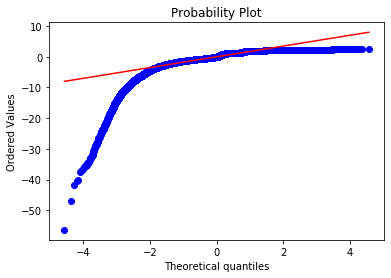

In [13]:
res = stats.probplot(df['V1'], plot=plt)

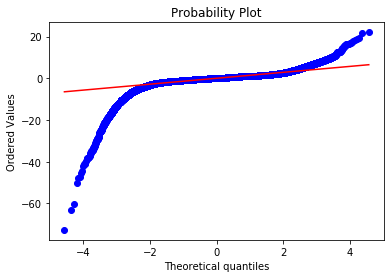

In [14]:
res = stats.probplot(df['V2'], plot=plt)

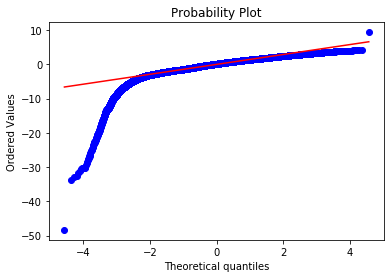

In [15]:
res = stats.probplot(df['V3'], plot=plt)

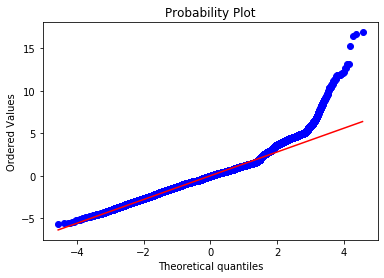

In [16]:
res = stats.probplot(df['V4'], plot=plt)

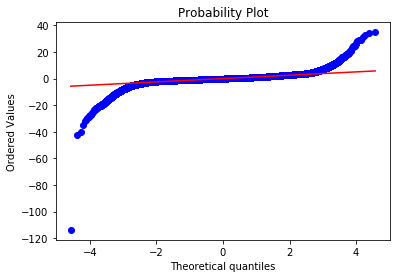

In [17]:
res = stats.probplot(df['V5'], plot=plt)

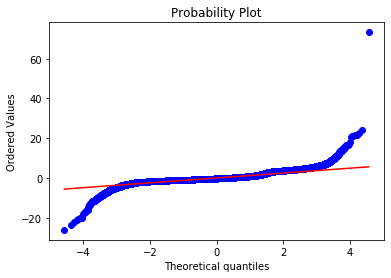

In [18]:
res = stats.probplot(df['V6'], plot=plt)

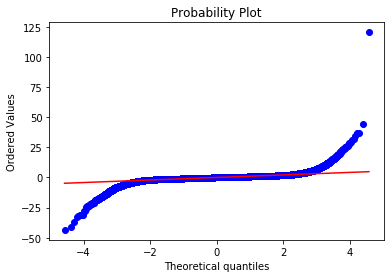

In [19]:
res = stats.probplot(df['V7'], plot=plt)

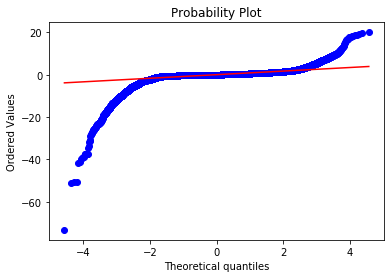

In [20]:
res = stats.probplot(df['V8'], plot=plt)

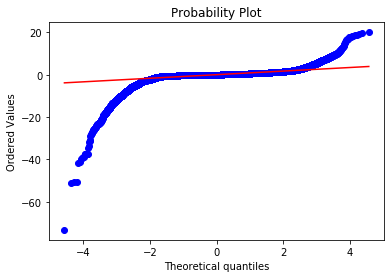

In [21]:
res = stats.probplot(df['V8'], plot=plt)

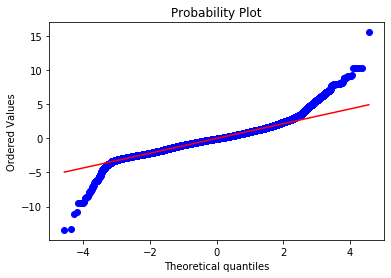

In [22]:
res = stats.probplot(df['V9'], plot=plt)

In [ ]:
# Plotting the Bar chart for showing the comparision between all the features
import matplotlib.pyplot as plt
df.plot(kind='bar')
plt.show()

In [ ]:
# To check the number of anamoly(1) and normal(0) in the class variable
# Normal variable are all the values of class with value 0. It is the normal data point. On the other hand class with value one it shows the outliers in the class feature.

df['Amount'] = np.log(df['Amount'] + 1)
df['Time'] = np.log(df['Time'] + 1)
normal = df[df['Class'] == 0]
anomaly = df[df['Class'] == 1]

# Understanding the shape of the normal and anamoly data

print(normal.shape)
print(anomaly.shape)

(27725, 31)
(93, 31)


In [ ]:
# Making a class for defining the model fitting  and making the function for prediction model

class hist_model(object):
    
    def __init__(self, bins=50):
        self.bins = bins
        
    def fit(self, X):
        
        bin_hight, bin_edge = [], []
        
        for var in X.T:
            # get bins hight and interval
            bh, bedge = np.histogram(var, bins=self.bins)
            bin_hight.append(bh)
            bin_edge.append(bedge)
        
        self.bin_hight = np.array(bin_hight)
        self.bin_edge = np.array(bin_edge)
   

    def predict(self, X):
        
        scores = []
        for obs in X:
            obs_score = []
            for i, var in enumerate(obs):
                # find wich bin obs is in
                bin_num = (var > self.bin_edge[i]).argmin()-1
                obs_score.append(self.bin_hight[i, bin_num]) # find bin hitght
            
            scores.append(np.mean(obs_score))
        
        return np.array(scores)
                
#fitting the model
        
model = hist_model()
model.fit(df.drop('Class', axis=1).values)


In [ ]:
from scipy.stats import multivariate_normal


mu = df.drop('Class', axis=1).mean(axis=0).values
sigma = df.drop('Class', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

In [ ]:
# Applying Gaussian Mixture Algorithm for model fitting
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=4, random_state=42)
gmm.fit(df.drop('Class', axis=1).values)
print(gmm.score(df[df['Class'] == 0].drop('Class', axis=1).values))
print(gmm.score(df[df['Class'] == 1].drop('Class', axis=1).values))

3.6145221342636265
-110.75461281593208


# **Data Visualization**

Data visualization is a compatible way of understandin the behaviour of the feature so that we can fit the model accurately

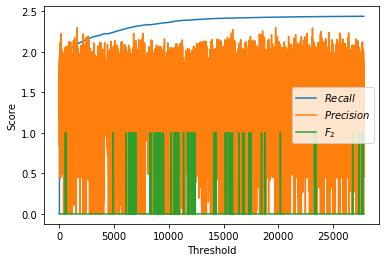

In [ ]:
# We need to check at what time the fraud is occuring with the class and how much amount
import matplotlib.pyplot as plt


plt.plot(df['Time'], label='$Recall$')
plt.plot(df['Amount'], label='$Precision$')
plt.plot(df['Class'], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()


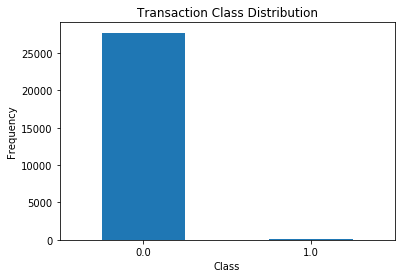

In [ ]:
# Checking the Transaction distribution with the Class [0 = Normal, 1 = Fraud]
count_classes = pd.value_counts(db['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2) )
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
# Making two variables Fraud and the normal data. Fraud has a value of one in the class feature and normal has a value of 0 in the class feature

Fraud = db[db['Class']==1]

Normal = db[db['Class']==0]

In [ ]:
# Checking the fraud shape
Fraud.shape

(93, 31)

In [ ]:
# Checking the Normal shape
Normal.shape

(27725, 31)

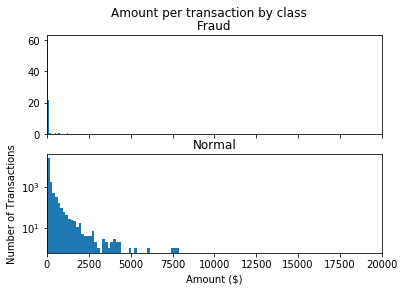

In [ ]:
# PLotting the graph separately for the amount of transaction of the clasws on the basis of Fraud and normal Detection

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

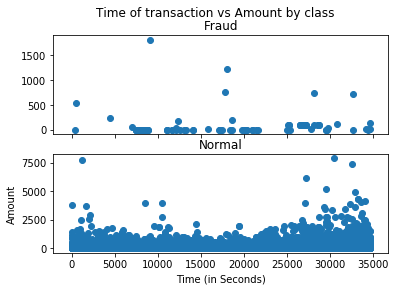

In [ ]:
# Plotting the scatter plot for the fraud and Normal detection with the help of time transaction and amount feature for detecting the credit card frauds.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()



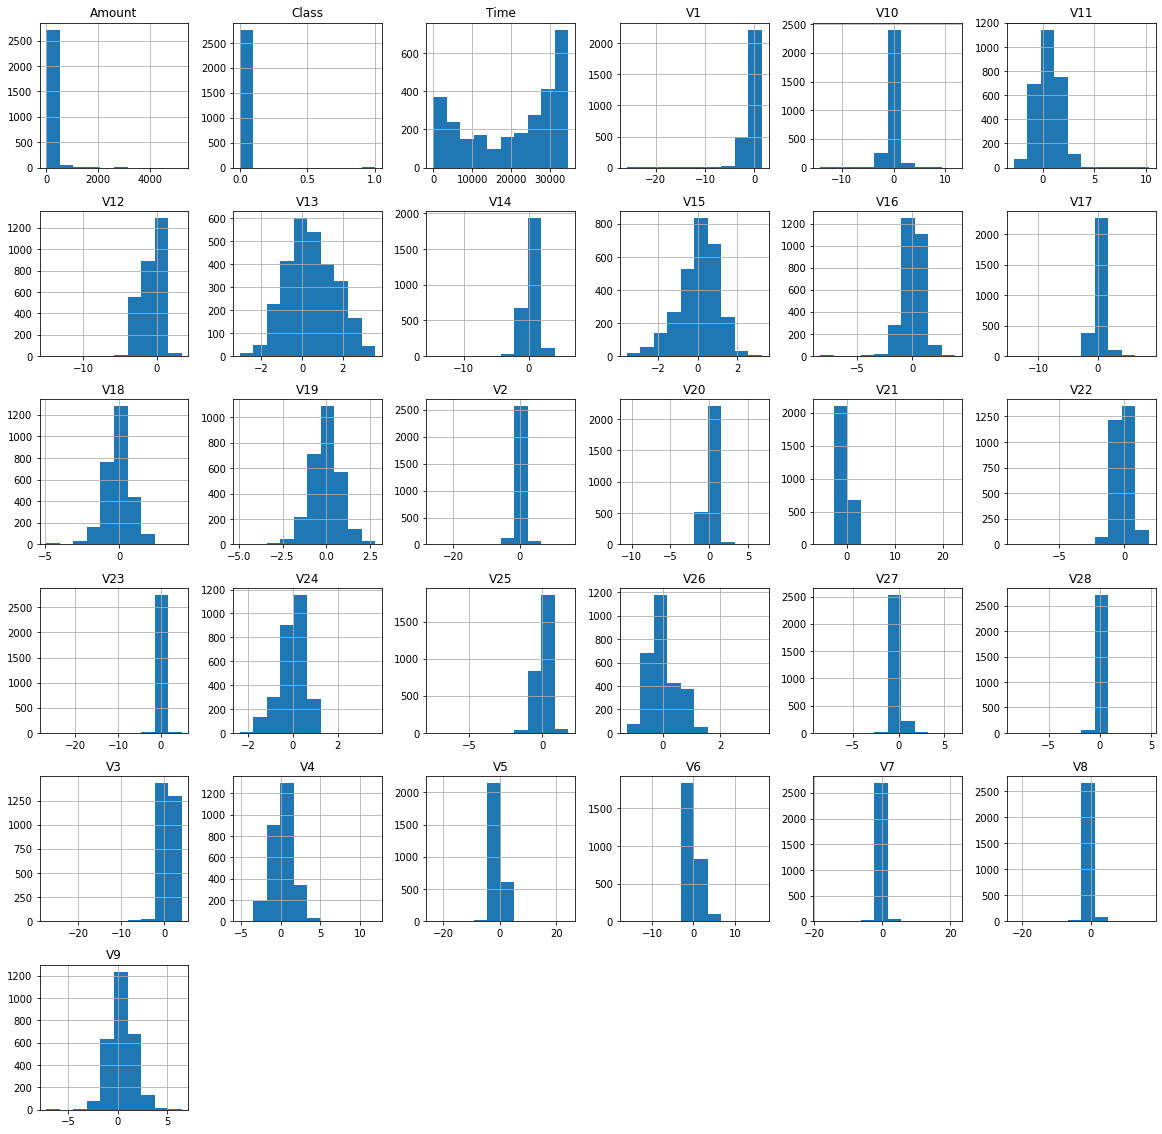

In [ ]:
# Plotting the individual Data to understand it more clearly
import matplotlib.pyplot as plt
data1= db.sample(frac = 0.1,random_state=1)

data1.shape
data1.hist(figsize=(20,20))
plt.show()

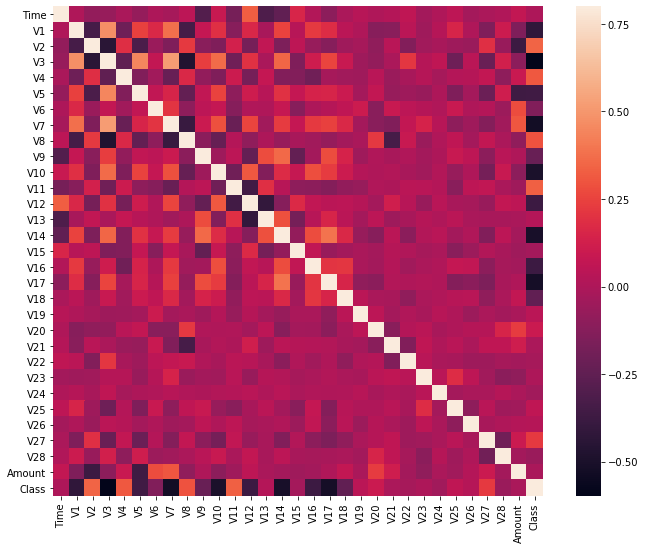

In [ ]:
# FInding the Correlation between the data points
import seaborn as sns

correlation_matrix = data1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()



In [ ]:
# Finding the outlier fraction by divind the fraud and valid variable count
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.004332129963898917


In [ ]:
# Importing the libraries from  sklearn package
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# **Model Fitting**

# **Why it is important to fit the model ?**

 If your model is not fitting the data accurately, the outcome it will produce would be inefficient for taking the decision in the practical use.

There are three ways the model can get fit. It is shown by the simple figure.

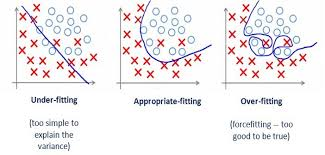

Let us take a definition to underfitting, overfitting and appropriate fitting.

Overfitting - The performance on the data is good but the accuracy generates overfits(poor) the data. 

Underfitting - The performance is poor and the accuracy generated by the model is also poor

Appropriate fitting - The performance and the generalization are both good

In [ ]:
# Making a classifier using oneClassSVM algorithm.

from sklearn.svm import OneClassSVM

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(db), 
                                       contamination=outlier_fraction,random_state = 0, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}



In [ ]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"

X = data1[columns]
Y = data1[target]
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:281: UserWarning: max_samples (27819) is greater than the total number of samples (2782). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


Isolation Forest: 9
Accuracy Score :
0.996764917325665
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2770
         1.0       0.62      0.67      0.64        12

    accuracy                           1.00      2782
   macro avg       0.81      0.83      0.82      2782
weighted avg       1.00      1.00      1.00      2782

Local Outlier Factor: 25
Accuracy Score :
0.9910136592379583
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2770
         1.0       0.00      0.00      0.00        12

    accuracy                           0.99      2782
   macro avg       0.50      0.50      0.50      2782
weighted avg       0.99      0.99      0.99      2782

Support Vector Machine: 1659
Accuracy Score :
0.403666427030913
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.40      


We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases 

Thus we can use autoencoder.

# **Advantages of Anamoly Detection**

1. It can Monitor the data source, networks, users, etc.
2. It can identify the Security threads.
3. It can find the trend of the unusual behavior of the data set and handles the security and safity.
4. It can identify key outliers.


# **Disadvantages**

The biggest Disadvantage is that it cannot identify the novelty attacks and the various existing attacks.